In [181]:
#Jannayna Domingues - Exercicio para tratamento de dados - Loja

In [77]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [79]:
#importar dados
dataset = pd.read_csv("dados_loja_tratamento.csv", sep =",")
#visulizar
dataset.head(20)

,Px,Qx,PP,CC
0,Camiseta,10.0,29.99,Feminino
1,Calça,5.0,79.99,Masculino
2,Vestido,0.0,NaN,Feminino
3,Saia,12.0,39.99,Feminino
4,Casaco,3.0,119.99,M
5,Carro,8.0,34.99,Feminino
6,Short,6.0,NaN,Masculino
7,Terno,2.0,199.99,Masculino
8,Macacão,4.0,89.99,F
9,Jaqueta,9.0,149.99,Masculino


In [81]:
#Tamanho da matriz
dataset.shape


(50, 4)

In [83]:
#Renomear as colunas
dataset.columns = ["Produto", "Quantidade", "Preço", "Categoria"]

In [85]:
dataset.head()

,Produto,Quantidade,Preço,Categoria
0,Camiseta,10.0,29.99,Feminino
1,Calça,5.0,79.99,Masculino
2,Vestido,0.0,NaN,Feminino
3,Saia,12.0,39.99,Feminino
4,Casaco,3.0,119.99,M


In [87]:
#Dados Categóricos
agrupado = dataset.groupby(['Produto']).size()
agrupado

Produto
Blusa        4
Calça        6
Camiseta     5
Carro        1
Casaco       4
Jaqueta      5
Macacão      5
Mesa         1
Saia         4
Short        5
Televisão    1
Terno        7
Vestido      2
dtype: int64

In [89]:
dataset['Produto'].describe()

count        50
unique       13
top       Terno
freq          7
Name: Produto, dtype: object

In [91]:
agrupado = dataset.groupby(['Categoria']).size()
agrupado

Categoria
F             4
Feminino     21
M             4
Masculino    21
dtype: int64

In [93]:
dataset['Categoria'].describe()

count           50
unique           4
top       Feminino
freq            21
Name: Categoria, dtype: object

In [95]:
#Analise dos dados numericos
dataset['Quantidade'].describe()

count    48.000000
mean      6.020833
std       3.342121
min       0.000000
25%       3.750000
50%       6.000000
75%       9.000000
max      12.000000
Name: Quantidade, dtype: float64

Text(0.5, 1.0, 'Quantidade de itens')

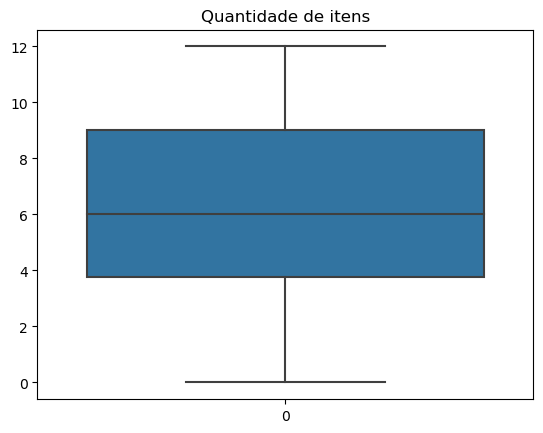

In [97]:
#Histograma do atributo numérico "Quantidade"
srn.boxplot(dataset['Quantidade']).set_title('Quantidade de itens')
#srn.histplot(dataset['Quantidade']).set_title('Quantidade de itens')
#srn.distplot(dataset['Quantidade']).set_title('Quantidade de itens')

In [101]:
#Dados Numéricos
agrupado = dataset.groupby(['Quantidade']).size()
agrupado

Quantidade
0.0     4
2.0     4
3.0     4
4.0     5
5.0     4
6.0     5
7.0     4
8.0     5
9.0     5
10.0    5
12.0    3
dtype: int64

In [103]:
#Análise dados numericos
dataset['Preço'].describe()

count     45.000000
mean      84.434444
std       56.731247
min       24.990000
25%       34.990000
50%       79.990000
75%      119.990000
max      199.990000
Name: Preço, dtype: float64

Text(0.5, 1.0, 'Preço')

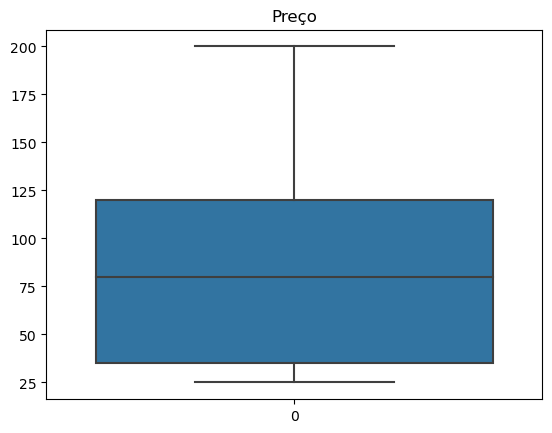

In [105]:
#srn.distplot(dataset['Preço']).set_title('Preço')
srn.boxplot(dataset['Preço']).set_title('Preço')

In [107]:
agrupado = dataset.groupby(['Preço']).size()
agrupado

Preço
24.99     3
29.99     5
34.99     5
39.99     5
49.99     3
79.99     5
89.99     5
119.99    5
149.99    4
199.99    5
dtype: int64

In [109]:
#Inicio do tratamento dos dados
#Verificar os atributos com valores ausentes NaN
dataset.isnull().sum()

Produto       0
Quantidade    2
Preço         5
Categoria     0
dtype: int64

In [113]:
#Calcular a mediana do atributo Preço e substituir o valor ausente pela mediana
mediana = sts.median(dataset['Preço'])
mediana

84.99

In [117]:
#preenche o valor ausente com a Mediana
dataset['Preço'].fillna(mediana, inplace=True)

In [119]:
#Calcular a mediana do atributo Quantidade e substituir o valor ausente pela mediana
mediana = sts.median(dataset['Quantidade'])
mediana

6.0

In [121]:
#preenche o valor ausente do atributo Quantidade com a Mediana
dataset['Quantidade'].fillna(mediana, inplace=True)

In [123]:
#Verificar se tem algum atributo com o valor ausente
dataset.isnull().sum()

Produto       0
Quantidade    0
Preço         0
Categoria     0
dtype: int64

In [131]:
dataset.head()

,Produto,Quantidade,Preço,Categoria
0,Camiseta,10.0,29.99,Feminino
1,Calça,5.0,79.99,Masculino
2,Vestido,0.0,84.99,Feminino
3,Saia,12.0,39.99,Feminino
4,Casaco,3.0,119.99,M


In [137]:
#Tratamento do dados categorico Produtos - retirar carro, mesa, televisão
dataset.loc[dataset['Produto'].isin( ['Carro','Mesa','Televisão']), 'Produto'] = "Terno"
#visualiza o resultado
agrupado = dataset.groupby(['Produto']).size()
agrupado

Produto
Blusa        4
Calça        6
Camiseta     5
Casaco       4
Jaqueta      5
Macacão      5
Saia         4
Short        5
Terno       10
Vestido      2
dtype: int64

In [139]:
#Organizar o atributo Categoria em Masculino e Feminino
dataset.loc[dataset['Categoria'].isin( ['M']), 'Categoria'] = "Masculino"
dataset.loc[dataset['Categoria'].isin( ['F']), 'Categoria'] = "Feminino"
#verificar resultado
agrupado = dataset.groupby(['Categoria']).size()
agrupado

Categoria
Feminino     25
Masculino    25
dtype: int64

In [143]:
dataset.head(15)

,Produto,Quantidade,Preço,Categoria
0,Camiseta,10.0,29.99,Feminino
1,Calça,5.0,79.99,Masculino
2,Vestido,0.0,84.99,Feminino
3,Saia,12.0,39.99,Feminino
4,Casaco,3.0,119.99,Masculino
5,Terno,8.0,34.99,Feminino
6,Short,6.0,84.99,Masculino
7,Terno,2.0,199.99,Masculino
8,Macacão,4.0,89.99,Feminino
9,Jaqueta,9.0,149.99,Masculino


In [147]:
dataset.shape

(50, 4)

In [149]:
dataset.to_csv('dados_loja_NOVO.csv')